In [187]:
import numpy as np
import time 
import random
from speedyibl import Agent
import numpy as np

TARGETS = [ [ { "payment": 2, "penalty":  -1, "monitored_probability": 0.22 },
              { "payment": 8, "penalty":  -5, "monitored_probability": 0.51 },
              { "payment": 9, "penalty":  -9, "monitored_probability": 0.42 },
              { "payment": 9, "penalty": -10, "monitored_probability": 0.40 },
              { "payment": 2, "penalty":  -6, "monitored_probability": 0.08 },
              { "payment": 5, "penalty":  -5, "monitored_probability": 0.36 } ],
            [ { "payment": 5, "penalty":  -3, "monitored_probability": 0.41 },
              { "payment": 8, "penalty":  -5, "monitored_probability": 0.48 },
              { "payment": 7, "penalty":  -6, "monitored_probability": 0.41 },
              { "payment": 8, "penalty":  -9, "monitored_probability": 0.37 },
              { "payment": 5, "penalty":  -7, "monitored_probability": 0.27 },
              { "payment": 2, "penalty":  -4, "monitored_probability": 0.05 } ],
            [ { "payment": 3, "penalty":  -3, "monitored_probability": 0.30 },
              { "payment": 9, "penalty":  -4, "monitored_probability": 0.60 },
              { "payment": 6, "penalty":  -6, "monitored_probability": 0.40 },
              { "payment": 5, "penalty":  -8, "monitored_probability": 0.29 },
              { "payment": 3, "penalty":  -6, "monitored_probability": 0.20 },
              { "payment": 2, "penalty":  -2, "monitored_probability": 0.20 } ],
            [ { "payment": 4, "penalty":  -3, "monitored_probability": 0.37 },
              { "payment": 6, "penalty":  -3, "monitored_probability": 0.51 },
              { "payment": 7, "penalty":  -7, "monitored_probability": 0.40 },
              { "payment": 5, "penalty": -10, "monitored_probability": 0.24 },
              { "payment": 5, "penalty":  -9, "monitored_probability": 0.26 },
              { "payment": 3, "penalty":  -4, "monitored_probability": 0.23 } ] ]

COVERAGE = [ [ { 2, 6 }, { 2, 4 }, { 2, 5 }, { 2, 4 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 1, 3 }, { 2, 4 }, { 2, 6 },
               { 2, 6 }, { 2, 4 }, { 1, 3 }, { 2, 4 }, { 2, 4 },
               { 1, 3 }, { 3, 6 }, { 2, 4 }, { 2, 4 }, { 3, 6 },
               { 1, 3 }, { 2, 4 }, { 3, 6 }, { 2, 4 }, { 1, 3 } ],
             [ { 2, 5 }, { 1, 3 }, { 1, 3 }, { 3, 6 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 2, 4 }, { 1, 3 }, { 1, 4 },
               { 1, 3 }, { 1, 3 }, { 2, 5 }, { 1, 3 }, { 1, 3 },
               { 1, 3 }, { 2, 5 }, { 2, 4 }, { 2, 4 }, { 1, 3 },
               { 1, 3 }, { 2, 4 }, { 2, 4 }, { 3, 6 }, { 2, 5 } ],
             [ { 2, 5 }, { 3, 6 }, { 2, 4 }, { 2, 5 }, { 2, 5 },
               { 2, 6 }, { 2, 6 }, { 1, 3 }, { 2, 4 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 1, 3 }, { 2, 6 }, { 2, 5 },
               { 1, 3 }, { 2, 4 }, { 1, 3 }, { 2, 4 }, { 2, 5 },
               { 2, 4 }, { 2, 4 }, { 2, 6 }, { 1, 3 }, { 2, 4 } ],
             [ { 2, 5 }, { 1, 4 }, { 3, 6 }, { 2, 6 }, { 1, 3 },
               { 1, 4 }, { 1, 3 }, { 2, 5 }, { 2, 6 }, { 1, 3 },
               { 1, 3 }, { 3, 6 }, { 2, 4 }, { 1, 4 }, { 1, 4 },
               { 1, 3 }, { 1, 3 }, { 1, 4 }, { 1, 3 }, { 2, 5 },
               { 3, 6 }, { 1, 3 }, { 1, 3 }, { 3, 6 }, { 1, 4 } ] ]

TRAINING_COVERAGE = [ { 2, 5 }, { 2, 4 }, { 1 , 3 }, { 1, 3 }, { 1, 3 } ]

SIGNALS = [ [ { 3, 4 }, { 3, 6 }, { 3, 6 }, { 3, 5, 6 }, { 2, 6 },
              { 3, 6 }, { 2, 4}, { 2, 6 }, { 3, 6 }, { 1, 3, 4 },
              { 3, 4 }, { 1, 3 }, { 4, 6 }, { 5}, { 3, 6 },
              { 2, 4 }, { 5 }, { 3 }, { 6 }, { 2, 4 },
              { 2, 4 }, set(), {2, 4, 5 }, { 3 }, { 5, 6 } ],
            [ { 3, 4 }, { 2, 4 }, { 2, 4, 5 }, { 4, 5 }, { 4, 5 },
              { 1, 3, 6 }, { 2 }, { 3 }, { 5 }, set(),
              { 2, 5 }, { 2, 5 }, {3, 4 }, { 2, 5 }, { 2, 4, 5 },
              { 4, 5 }, { 3, 4 }, { 3, 5, 6 }, { 1, 5}, { 2, 5 },
              { 2 }, { 1, 5 }, { 1, 3, 5 }, { 4 }, { 1, 3, 4, 6 } ],
            [ { 1, 3, 6 }, { 2, 4 }, set(), { 1, 3, 4 }, { 3 },
              { 1, 4, 5 }, { 5 }, { 2, 4}, { 1, 3, 5 }, set(),
              { 1, 3, 5 }, { 2 }, { 2, 4, 5 }, { 5 }, { 3, 4 },
              { 2, 4, 5, 6 }, { 1, 3, 5 }, { 2, 4, 6 }, { 1, 3 }, { 1, 4 },
              { 5 }, {3 }, set(), { 2, 5, 6 }, { 1, 3, 5, 6 } ],
            [ { 6 }, { 3 }, { 2, 4 }, { 4, 5}, { 6 },
              { 3, 5 }, { 4 }, { 3, 4, 6 }, { 1, 3, 4, 5 }, { 2, 4, 6 },
              {4, 5 }, { 2, 5 }, { 1, 5, 6 }, { 2, 3, 6 }, { 2, 3 },
              { 5 }, { 2, 4, 5, 6 }, { 2, 3, 5, 6 }, { 2, 4, 5 }, { 1, 3, 4, 6 },
              { 2, 4, 5 }, { 4, 5 }, { 4 }, { 4, 5 }, { 3, 5, 6 } ] ]

TRAINING_SIGNALS = [ { 3, 4 }, {1, 3, 6 }, { 5 }, { 2, 5 }, {2, 4, 5} ]


#Training signal and training coverage is for prepopulating the instances for agent to have ideas of rewards and payoff.

In [245]:
for coverage_list, signal_list in zip(COVERAGE, SIGNALS):
    for coverage, signal in zip(coverage_list, signal_list):
        signal.update(coverage)

#NUMBER OF THE Target is returned by the len function of inner list of TARGETS.        
option_count=len(TARGETS[0])
#numberofblocks return the number of block or the len of outer list of target
Number_of_blocks=len(TARGETS)
trials=len(SIGNALS[0])


selection_agent = Agent(default_utility=None,mismatchPenalty = 2.5)
attack_agent = Agent(default_utility=None)
selection_agent.similarity([0,1], lambda x, y: 1 - abs(x - y) / 10)
selection_agent.similarity([2], lambda x, y: 1 - abs(x -y))

attacks = [0] * Number_of_blocks * trials

participants =100
data = []
time_taken_by_particpants_for_each_trial = []
total_rewards_per_participant = []




In [246]:
trials

25

In [247]:
Number_of_blocks

4

In [248]:
option_count

6

In [251]:
for person in range(participants):
    reward = 0  # tracking rewards for each participant
    ttime = [0]

    selection_agent.reset()
    selection_agent.similarity([0, 1], lambda x, y: 1 - abs(x - y) / 10)
    selection_agent.similarity([2], lambda x, y: 1 - abs(x - y))

    attack_agent.reset()
    # taking 5 pre-trials with the training coverage and the training signals so that it can function better for calculating the similarity function.
    populate = random.randrange(5)

    # 20% chance that given training round will be equal to populate:
    # when it equals it triggers: duplicate instance code:for each participant:
    # for testing agent's ability to discover duplicate data rather than thinking each prepopulate data as new one.
    
    
    
    for i in range(5):
        n = random.randrange(option_count)
        # change_Made_randomly selecting the blocks for pre-populating
        d = random.randrange(Number_of_blocks)
        x = TARGETS[d][n]
        monitored = n + 1 in TRAINING_COVERAGE[i]
        selection_agent.prepopulate(((x["payment"],
                                      x["penalty"],
                                      x["monitored_probability"]), i + 1),
                                     x["penalty" if monitored else "payment"])
        attack_agent.prepopulate((True, n + 1 in TRAINING_SIGNALS[i]), x["penalty" if monitored else "payment"])
        attack_agent.prepopulate((False, False), 0)  # reward 0 for not attack, no signal
        attack_agent.prepopulate((False, True), 0)  # not attack despite the signal reward 0
        attack_agent.prepopulate((True, False), 10)  # attack without signal reward high of 10
        attack_agent.prepopulate((False, True), 5)  # attack with signal reward of 5 moderate
        
        
        
        

        # 20% chance that given training round will be equal to populate:
        # when it equals it triggers: duplicate instance code:for each participant:
        # for testing agent's ability to discover duplicate data rather than thinking each prepopulate data as new one.
        if i == populate:
            dummy_attrs = (-1, -1, -1)
            dummy_index = i + 6
            selection_agent.prepopulate((dummy_attrs, dummy_index), 0)

    for block in range(Number_of_blocks):
        start = time.time()
        selection = [((x["payment"], x["penalty"], x["monitored_probability"]), i + 1)
                     for x, i in zip(TARGETS[block], range(option_count))]
        
        
        
        
        

        for no_trial in range(trials):
            chosen_option = selection_agent.choose(selection)[1]
            warning = chosen_option in SIGNALS[block][no_trial]
            paid = TARGETS[block][chosen_option - 1]["payment"]
            attack = attack_agent.choose([(True, warning), (False, warning)])[0]
            monitored = chosen_option in COVERAGE[block][no_trial]
            
            
            

            if not attack:
                payoff = 0
            else:
                payoff = TARGETS[block][chosen_option - 1]["penalty" if monitored else "payment"]
                attacks[block * 25 + no_trial] += 1
            reward += payoff
            attack_agent.respond(payoff)
            selection_agent.respond(payoff)
            data.append([person + 1, block + 1, no_trial + 1, block * 25 + no_trial + 1, chosen_option, int(warning),
                         int(monitored), int(attack), payoff, reward])
            end = time.time()
            ttime.append(ttime[-1] + end - start)
    total_rewards_per_participant.append(reward) 
    
time_taken_by_particpants_for_each_trial.append(ttime)
average_rewards = [total / trials for total in total_rewards_per_participant]



In [258]:
average_rewards

[5.56,
 3.88,
 1.64,
 4.8,
 6.72,
 6.28,
 7.28,
 2.12,
 6.44,
 3.88,
 6.48,
 3.48,
 4.24,
 8.6,
 6.64,
 4.12,
 3.76,
 2.92,
 4.92,
 3.2,
 4.56,
 6.6,
 6.0,
 4.88,
 4.6,
 6.08,
 6.2,
 3.08,
 5.44,
 4.84,
 2.6,
 7.8,
 4.84,
 1.68,
 4.32,
 6.56,
 5.64,
 5.52,
 5.44,
 2.4,
 4.16,
 6.52,
 2.12,
 3.0,
 4.32,
 1.76,
 2.2,
 6.12,
 5.76,
 7.56,
 7.48,
 4.16,
 7.48,
 4.88,
 6.12,
 6.4,
 3.16,
 8.12,
 4.44,
 6.6,
 4.32,
 7.4,
 5.48,
 5.16,
 6.68,
 6.2,
 6.04,
 3.96,
 6.16,
 8.52,
 5.28,
 7.96,
 6.84,
 5.64,
 3.4,
 4.88,
 8.0,
 5.08,
 7.28,
 5.16,
 7.44,
 6.12,
 2.52,
 7.68,
 3.48,
 3.92,
 4.92,
 5.72,
 7.72,
 6.6,
 3.24,
 6.88,
 4.28,
 5.84,
 3.68,
 6.92,
 3.0,
 5.16,
 4.04,
 5.4,
 5.84,
 5.2,
 6.64,
 6.12,
 2.2,
 5.52,
 6.4,
 3.92,
 8.36,
 4.88,
 3.16,
 7.04,
 4.8,
 3.84,
 8.12,
 3.96,
 3.48,
 3.68,
 3.88,
 6.64,
 4.72,
 3.0,
 5.84,
 6.8,
 7.48,
 9.32,
 3.84,
 4.6,
 6.96,
 5.56,
 5.96,
 5.96,
 6.92,
 7.44,
 6.96,
 5.16,
 3.52,
 3.88,
 8.16,
 3.52,
 7.24,
 4.96,
 3.48,
 2.76,
 5.08,
 5.12,
 4.84,

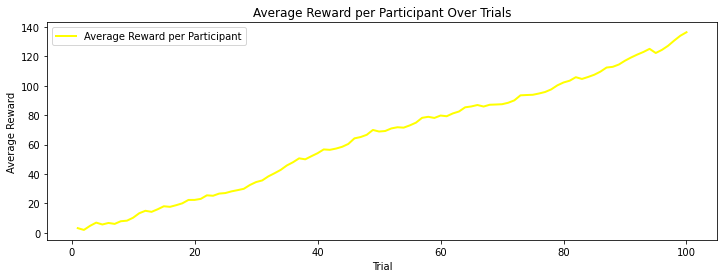

In [257]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data)
df['Cumulative Payoff'] = df.groupby(1)[9].cumsum()

# Calculate average reward per participant over trials
average_reward_per_participant = df.groupby(3).mean()[9]

# Plotting average reward per participant
plt.plot(average_reward_per_participant, '-', color='yellow', linewidth=2, label='Average Reward per Participant')
plt.title('Average Reward per Participant Over Trials')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.legend()

plt.show()



In [ ]:
selection_agent.instances()

In [ ]:
attack_agent.instances()

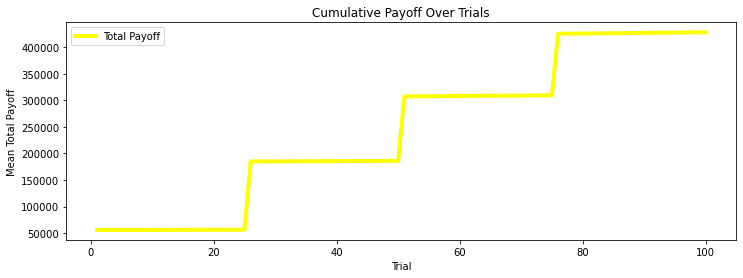

In [273]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data)

# Calculate cumulative sum of payoff by run
df[10] = df.groupby(1)[9].cumsum() 
plt.plot(df.groupby(3).mean()[10],  '-',color='yellow',linewidth=4,label='Total Payoff')
plt.title('Cumulative Payoff Over Trials')
plt.xlabel('Trial')
plt.ylabel('Mean Total Payoff') 
plt.legend()

plt.show()

No handles with labels found to put in legend.


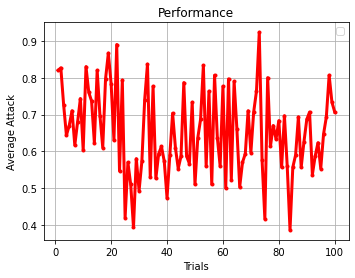

In [275]:
#plot shows how the number of attacks changes over trials
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(int('12'+str(1)))
df = pd.DataFrame(data)
plt.plot(range(1,101), df.groupby(3).mean()[7], 'o-', color='red', markersize=3, linewidth =3, linestyle='solid')


plt.ylabel('Average Attack')
plt.xlabel('Trials')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()


     

No handles with labels found to put in legend.


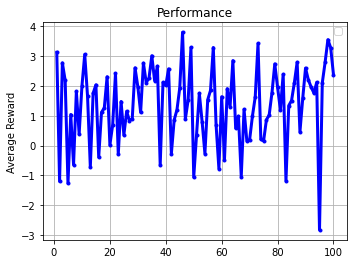

In [276]:
#plot show how average reward across participants for that trial
plt.subplot(int('12'+str(2)))
df = pd.DataFrame(data)
plt.plot(range(1,101), df.groupby(3).mean()[8], 'o-', color='blue', markersize=3, linewidth =3, linestyle='solid')
plt.ylabel('Average Reward')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

In [264]:
data

[[1, 1, 1, 1, 3, 1, 0, 1, 9, 9],
 [1, 1, 2, 2, 3, 1, 0, 1, 9, 18],
 [1, 1, 3, 3, 3, 1, 0, 1, 9, 27],
 [1, 1, 4, 4, 3, 1, 0, 1, 9, 36],
 [1, 1, 5, 5, 3, 1, 1, 1, -9, 27],
 [1, 1, 6, 6, 3, 1, 0, 0, 0, 27],
 [1, 1, 7, 7, 3, 1, 1, 1, -9, 18],
 [1, 1, 8, 8, 2, 1, 0, 1, 8, 26],
 [1, 1, 9, 9, 2, 1, 1, 1, -5, 21],
 [1, 1, 10, 10, 1, 1, 0, 1, 2, 23],
 [1, 1, 11, 11, 3, 1, 0, 1, 9, 32],
 [1, 1, 12, 12, 3, 1, 0, 1, 9, 41],
 [1, 1, 13, 13, 3, 1, 1, 1, -9, 32],
 [1, 1, 14, 14, 3, 0, 0, 1, 9, 41],
 [1, 1, 15, 15, 3, 1, 0, 0, 0, 41],
 [1, 1, 16, 16, 1, 1, 1, 1, -1, 40],
 [1, 1, 17, 17, 3, 1, 1, 1, -9, 31],
 [1, 1, 18, 18, 3, 1, 0, 0, 0, 31],
 [1, 1, 19, 19, 2, 1, 1, 1, -5, 26],
 [1, 1, 20, 20, 3, 1, 1, 0, 0, 26],
 [1, 1, 21, 21, 3, 1, 1, 0, 0, 26],
 [1, 1, 22, 22, 1, 0, 0, 1, 2, 28],
 [1, 1, 23, 23, 3, 1, 1, 1, -9, 19],
 [1, 1, 24, 24, 1, 0, 0, 1, 2, 21],
 [1, 1, 25, 25, 1, 1, 1, 1, -1, 20],
 [1, 2, 1, 26, 6, 0, 0, 1, 2, 22],
 [1, 2, 2, 27, 3, 1, 1, 0, 0, 22],
 [1, 2, 3, 28, 6, 0, 0, 1, 2, 24],
 [1, 

In [265]:
no_trial

24

In [266]:
choosen_option

5

In [238]:
warned

True

In [239]:
attack

False

In [240]:
pmnt

3

In [241]:
monitored

True

In [242]:
import csv

# Your data
data = data
# Column names
columns = ["Participants", "Blocks", "Trials", "Block_trial", "Option", "Signal", "Monitored", "Attack", "Payoff", "Total"]

# Write the data to a CSV file
with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the column names
    writer.writerow(columns)
    
    # Write the data rows
    writer.writerows(data)


In [243]:
import pandas as pd
a=pd.read_csv("output.csv")
a

,Participants,Blocks,Trials,Block_trial,Option,Signal,Monitored,Attack,Payoff,Total
0,1,1,1,1,4,1,0,1,9,9
1,1,1,2,2,4,1,1,1,-10,-1
2,1,1,3,3,2,1,1,0,0,-1
3,1,1,4,4,2,1,1,1,-5,-6
4,1,1,5,5,6,1,0,0,0,-6
...,...,...,...,...,...,...,...,...,...,...
9995,100,4,21,96,1,0,0,1,4,83
9996,100,4,22,97,1,1,1,0,0,83
9997,100,4,23,98,1,1,1,0,0,83
9998,100,4,24,99,1,0,0,1,4,87


In [244]:
import pandas as pd



# Read the CSV file into a DataFrame
a = pd.read_csv('output.csv')

# Find distinct values for each column
distinct_values = {}

for column in a.columns:
    distinct_values[column] = a[column].unique()

# Print distinct values for each column
for column, values in distinct_values.items():
    print(f"Distinct values in '{column}':")
    for value in values:
        print(value)
    print()


Distinct values in 'Participants':
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100

Distinct values in 'Blocks':
1
2
3
4

Distinct values in 'Trials':
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25

Distinct values in 'Block_trial':
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100

Distinct values in 'Option':
4
2
6
1
3
5

Distinct values in 'Signal':
1
0

Distinct values in 'Monitored':
0
1

Distinct values in 'Attack':
1
0

Distinct values in 'Payoff':
9
-10
0
-5
5
2
3
4
-9
7
-6
-8
6
-2
